<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1 - Become familiar with the dataset
### The following describes the dataset variables:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

## Median Value of Owner-Occupied Homes (Boxplot - Task 2)

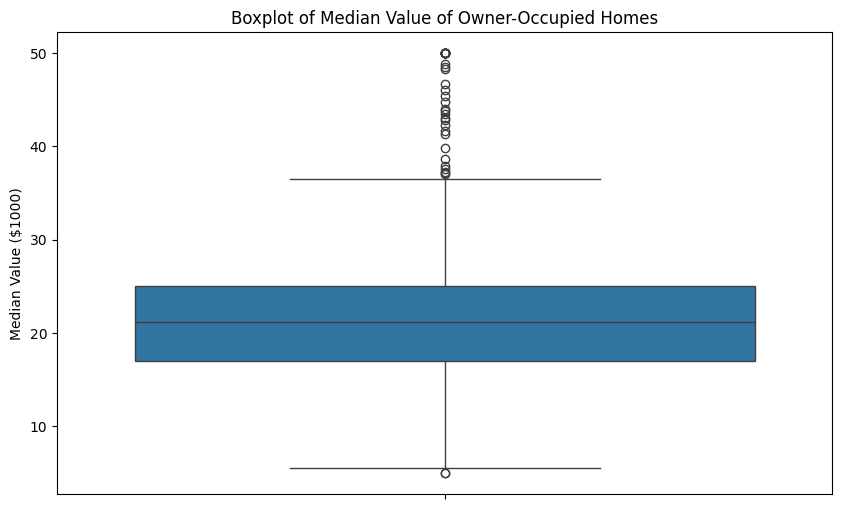

In [7]:
# Boxplot for the Median value of owner-occupied homes
pyplot.figure(figsize=(10, 6))
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value ($1000)')
pyplot.show()

Explanaion: This boxplot visualizes the distribution of the median value of owner-occupied homes. The box represents the interquartile range (IQR), and the line inside the box is the median. The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively. Outliers are shown as individual points beyond the whiskers.

## Charles River Variable (Bar Plot - Task 2)

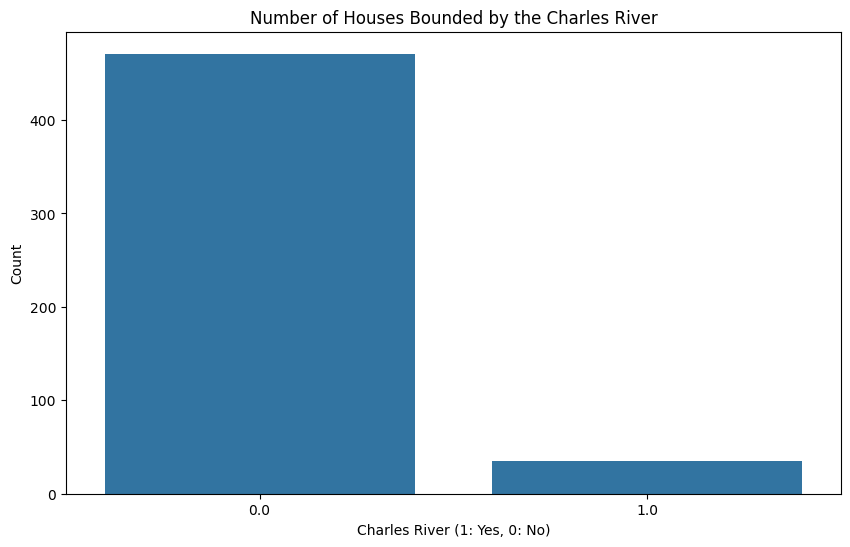

In [8]:
# Bar plot for the Charles River variable
pyplot.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Number of Houses Bounded by the Charles River')
pyplot.xlabel('Charles River (1: Yes, 0: No)')
pyplot.ylabel('Count')
pyplot.show()

Explanation: This bar plot shows the number of houses that are bounded by the Charles River (CHAS = 1) versus those that are not (CHAS = 0).

## Median Value vs. Age (Boxplot - Task 2)

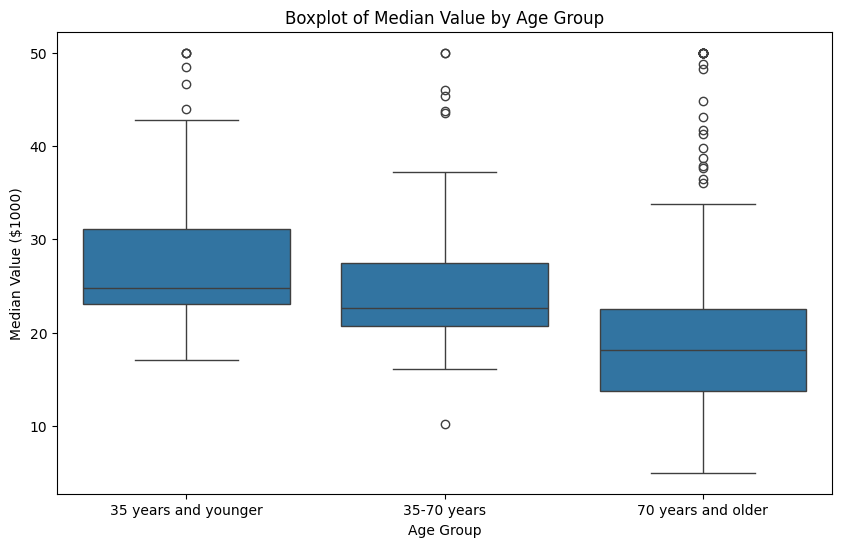

In [9]:
# Discretize AGE variable into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35-70 years', '70 years and older'])

# Boxplot for MEDV vs. AGE_GROUP
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000)')
pyplot.show()

Explanation: This boxplot compares the median values of homes across different age groups. It helps us understand if there are significant differences in home values based on the age of the properties.

## Nitric Oxide Concentrations vs. Non-Retail Business Acres (Scatter Plot - Task 2)

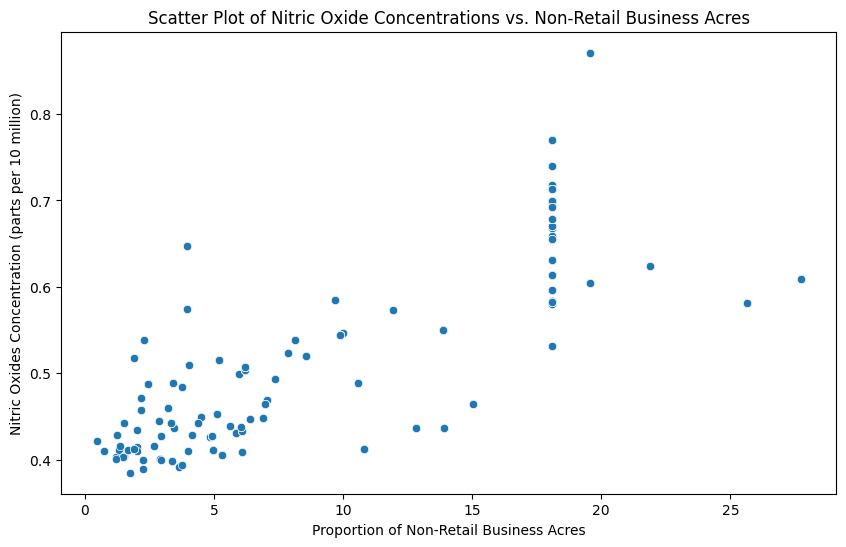

In [10]:
# Scatter plot for NOX vs. INDUS
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs. Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres')
pyplot.ylabel('Nitric Oxides Concentration (parts per 10 million)')
pyplot.show()

Explanation: Explanation: This scatter plot shows the relationship between the proportion of non-retail business acres (INDUS) and nitric oxide concentrations (NOX). It helps visualize whether there's a correlation between these variables.

## Pupil to Teacher Ratio (Histogram - Task 2)

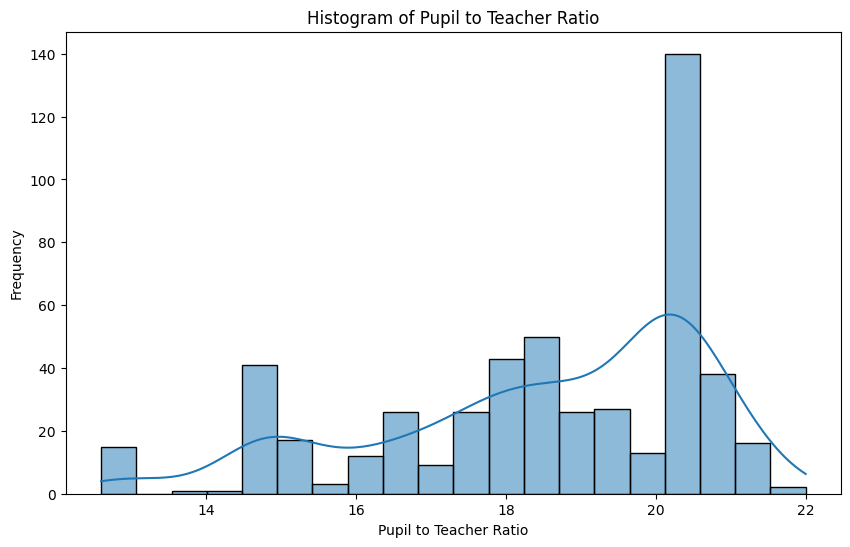

In [11]:
# Histogram for Pupil to Teacher Ratio
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

Explanation: Explanation: This histogram shows the distribution of the pupil-to-teacher ratio across different towns. The KDE (Kernel Density Estimate) line helps in understanding the probability density of the data.

# Task 3 - Use the appropriate tests to answer the questions provided.

### For each of the following questions;
A. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

B. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

C. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

D. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## Hypothesis Testing
Let's address the four specific questions with hypothesis testing.

### A. Difference in Median Value of Houses Bounded by the Charles River
Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River (CHAS).
Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River.

In [13]:
# T-test for independent samples
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(chas_0, chas_1)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River.


#### Answer to A: There is a significant difference in the median value of houses bounded by the Charles River.

### B. Difference in Median Values for Age Groups
Hypothesis:

Null Hypothesis (H0): There is no difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.
Alternative Hypothesis (H1): There is a difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.

In [14]:
# ANOVA test
anova_result = ols('MEDV ~ AGE_GROUP', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)

print(anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median values of houses for different age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median values of houses for different age groups.")

                 sum_sq     df         F        PR(>F)
AGE_GROUP   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN
Reject the null hypothesis: There is a significant difference in the median values of houses for different age groups.


#### Answer to B: There is a significant difference in the median values of houses for different age groups.

### C. Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres
Hypothesis:

Null Hypothesis (H0): There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.
Alternative Hypothesis (H1): There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

In [16]:
# Pearson correlation
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and non-retail business acres.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between nitric oxide concentrations and non-retail business acres.")

Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and non-retail business acres.


#### Answer to C: There is a significant relationship between nitric oxide concentrations and non-retail business acres.

### D. Impact of Distance to Employment Centers on Median Value
Hypothesis:

Null Hypothesis (H0): The weighted distance to five Boston employment centers does not impact the median value of owner-occupied homes.
Alternative Hypothesis (H1): The weighted distance to five Boston employment centers impacts the median value of owner-occupied homes.


In [17]:
# Regression analysis
X = boston_df['DIS']
Y = boston_df['MEDV']

X = sm.add_constant(X)  # Add constant term to predictor

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

if model.pvalues[1] < 0.05:
    print("Reject the null hypothesis: The weighted distance to employment centers impacts the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: The weighted distance to employment centers does not impact the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.21e-08
Time:                        12:02:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### Answer to D: From the results above, Coefficient for DIS is 1.0916, which indicates that for each additional unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes increases by approximately $1,091.60.